<a href="https://colab.research.google.com/github/alilumii/immunoinformatics_FBB/blob/main/Immunoinformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Домашнее задание по HLA-типированию:

### Подготовка среды для работы nextflow и hlatyping в Google Colaboratory:

*Код взят из [документации к nextflow](https://nf-co.re/docs/tutorials/google_colab/nf-core_colab_guide#setting-up-the-environment-in-google-colab):*

In [ ]:
# устанавливаем Java
!apt update
!apt install openjdk-17-jdk
!export JAVA_HOME=/usr/lib/jvm/java-17-openjdk-amd64
!export PATH=$JAVA_HOME/bin:$PATH
!source ~/.bashrc

In [ ]:
!wget -qO- https://get.nextflow.io | bash # скачивание Nextflow
!mv nextflow /usr/bin/nextflow
!chmod +x /usr/bin/nextflow
!nextflow -v # тестирование

In [ ]:
!pip install -q condacolab # скачиваем condacolab
import condacolab
condacolab.install()

In [ ]:
# добавляем каналы
!conda config --add channels bioconda
!conda config --add channels conda-forge
!conda config --set channel_priority strict

### Прогоняем hlatyping в Google Colab:

In [ ]:
# клонируем репозиторий
# в конфигах (папка conf/) меняем число CPU на 2, память - на 12 GB (можно даже меньше?)

! git clone https://github.com/nf-core/hlatyping.git

In [ ]:
# меняем backend, потому что конфликтует библиотека matplotlib Optitype и Google Colab

import os
os.environ['MPLBACKEND'] = 'Agg'

In [ ]:
# запускаем hlatyping

! nextflow run hlatyping/main.nf -profile conda,test --outdir hlatyping-results

curl: /usr/local/lib/libcurl.so.4: no version information available (required by curl)

 N E X T F L O W   ~  version 25.10.0

Launching `hlatyping/main.nf` [intergalactic_goldstine] DSL2 - revision: 770bb6b844


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/hlatyping 2.1.0
------------------------------------------------------
Input/output options
  input                     : https://raw.githubusercontent.com/nf-core/test-datasets/hlatyping/samplesheets/samplesheet_bam.csv
  outdir                    : hlatyping-results

Institutional config options
  config_profile_name       : Test profile
  config_profile_description: Minimal test dataset to check pipeline function

Generic options
  multiqc_logo              : /content/h

In [ ]:
# визуализация результатов hlatypng

import pandas as pd

res = pd.read_csv('/content/hlatyping-results/optitype/SAMPLE_PAIRED_END_BAM/SAMPLE_PAIRED_END_BAM_result.tsv', sep='\t')
print(res)

   Unnamed: 0       A1       A2       B1       B2       C1       C2   Reads  \
0           0  A*01:01  A*01:01  B*08:01  B*57:01  C*06:02  C*07:01  1129.0   

   Objective  
0   1108.678  


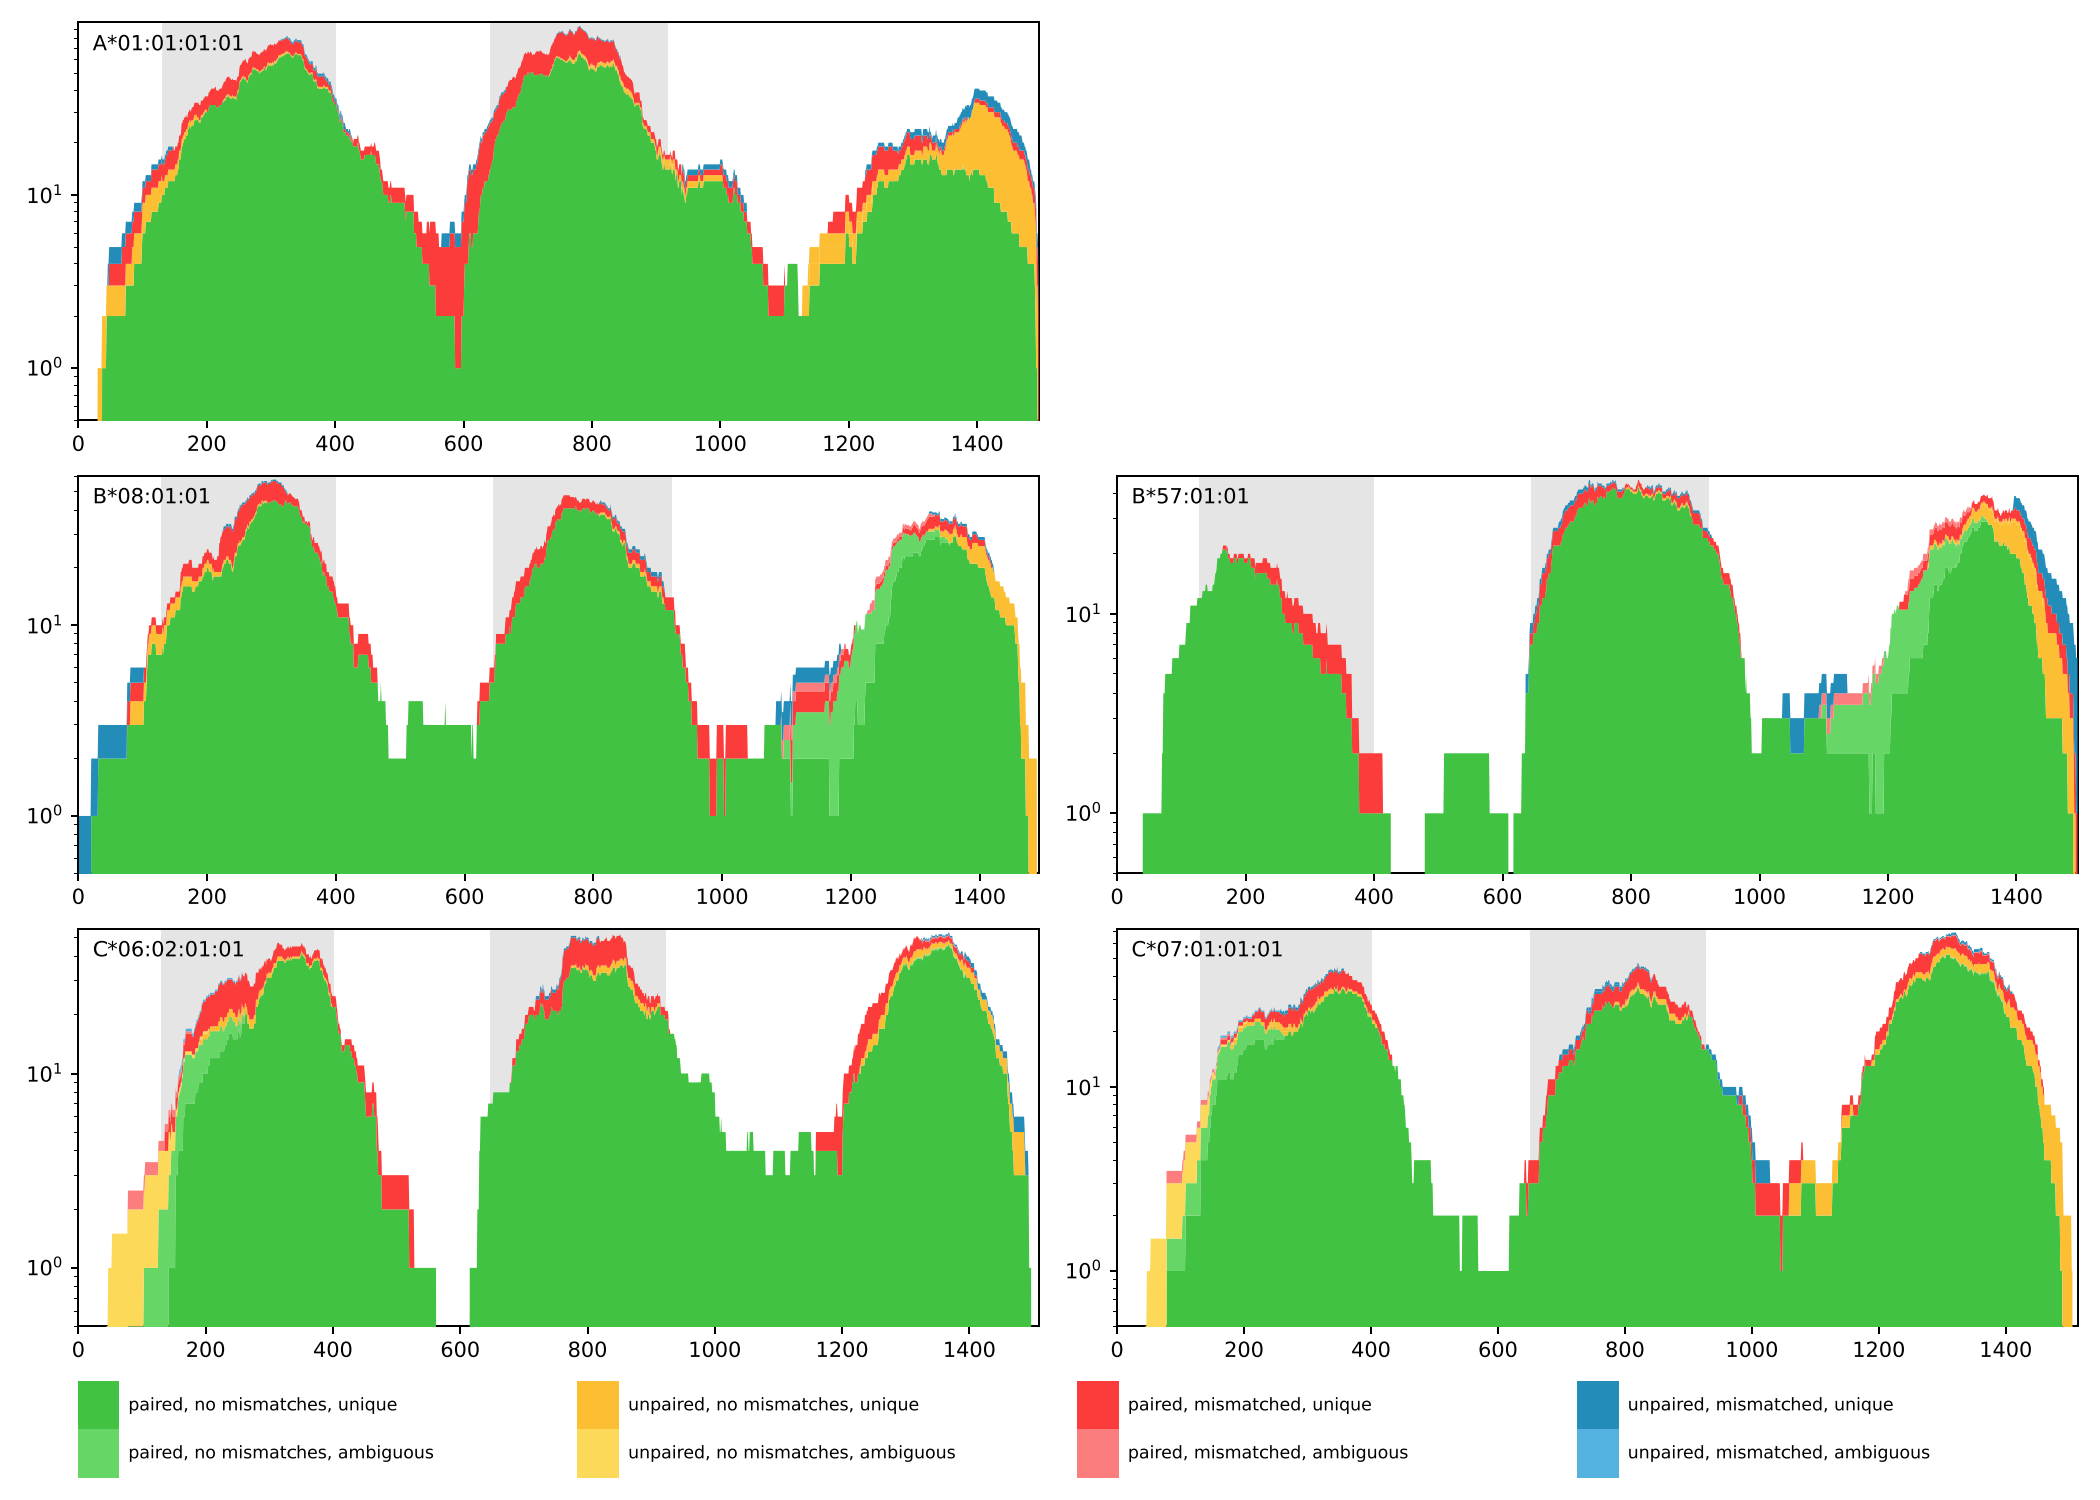

Можно скачать всю выдачу hlatypng в виде zip-архива:

In [ ]:
!zip -r /content/hlatyping-res.zip /content/hlatyping-results/

In [ ]:
from google.colab import files
files.download("/content/hlatyping-res.zip")

### BWA